In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.models import model_from_json

from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten

from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

In [3]:
X = np.load("data/X_KingNB.npy")
X.shape

(12364, 80, 40, 20)

In [4]:
Y = np.load("data/Y_KingNB.npy")
Y.shape

(12364, 1)

In [5]:
np.unique(Y).shape

(51,)

In [6]:
np.unique(Y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], dtype=int32)

In [7]:
for idx in range(Y.shape[0]):
    if Y[idx]>30 and Y[idx]<36:
        Y[idx] -= 1
Y[Y==37]=35
Y[Y==38]=36
Y[Y==40]=37
Y[Y==42]=38
Y[Y==45]=39
Y[Y==47]=40
Y[Y==48]=41
Y[Y==49]=42
Y[Y==51]=43
Y[Y==52]=44
Y[Y==53]=45
Y[Y==55]=46
Y[Y==56]=47
Y[Y==57]=48
Y[Y==58]=49
Y[Y==59]=50
Y[Y==60]=51
Y -= 1
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 49], dtype=int32)

In [8]:
Y = np_utils.to_categorical(Y, num_classes=51)

In [9]:
model = Sequential()

model.add(Conv2D(name="conv1-1", activation="relu",
                 input_shape=(80, 40, 20), padding="same",
                 strides=(1, 1), filters=8, kernel_size=(3, 3)))
model.add(Conv2D(name="conv1-2", activation="relu", padding="same",
                 strides=(2, 2), filters=8, kernel_size=(3, 3)))
model.add(MaxPool2D(name="pool-1", pool_size=(1, 1), strides=(1, 1)))

model.add(Conv2D(name="conv2-1", activation="relu", padding="same",
                 strides=(1, 1), filters=16, kernel_size=(3, 3)))
model.add(Conv2D(name="conv2-2", activation="relu", padding="same",
                 strides=(2, 2), filters=16, kernel_size=(3, 3)))
model.add(MaxPool2D(name="pool-2", pool_size=(1, 1), strides=(1, 1)))

model.add(Conv2D(name="conv3-1", activation="relu", padding="same",
                 strides=(1, 1), filters=32, kernel_size=(3, 3)))
model.add(Conv2D(name="conv3-2", activation="relu", padding="same",
                 strides=(2, 2), filters=32, kernel_size=(3, 3)))

model.add(Conv2D(name="conv4-1", activation="relu", padding="same",
                 strides=(1, 1), filters=64, kernel_size=(3, 3)))
model.add(Conv2D(name="conv4-2", activation="relu", padding="same",
                 strides=(2, 2), filters=64, kernel_size=(3, 3)))

model.add(Flatten())

model.add(Dense(51, name="fc6"))
model.add(Dropout(.5))
model.add(Activation('softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1-1 (Conv2D)             (None, 80, 40, 8)         1448      
_________________________________________________________________
conv1-2 (Conv2D)             (None, 40, 20, 8)         584       
_________________________________________________________________
pool-1 (MaxPooling2D)        (None, 40, 20, 8)         0         
_________________________________________________________________
conv2-1 (Conv2D)             (None, 40, 20, 16)        1168      
_________________________________________________________________
conv2-2 (Conv2D)             (None, 20, 10, 16)        2320      
_________________________________________________________________
pool-2 (MaxPooling2D)        (None, 20, 10, 16)        0         
_________________________________________________________________
conv3-1 (Conv2D)             (None, 20, 10, 32)        4640      
__________

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=200)

Train on 8283 samples, validate on 4081 samples
Epoch 1/20
8283/8283 [==============================] - 45s 5ms/step - loss: 3.6305 - acc: 0.0625 - val_loss: 5.7766 - val_acc: 0.0000e+00
Epoch 2/20
8283/8283 [==============================] - 44s 5ms/step - loss: 3.3834 - acc: 0.1138 - val_loss: 6.7669 - val_acc: 0.0000e+00
Epoch 3/20
8283/8283 [==============================] - 44s 5ms/step - loss: 3.2532 - acc: 0.1613 - val_loss: 8.9894 - val_acc: 0.0000e+00
Epoch 4/20
8283/8283 [==============================] - 44s 5ms/step - loss: 3.0859 - acc: 0.2131 - val_loss: 9.0106 - val_acc: 0.0000e+00
Epoch 5/20
8283/8283 [==============================] - 44s 5ms/step - loss: 2.9817 - acc: 0.2417 - val_loss: 10.5653 - val_acc: 0.0000e+00
Epoch 6/20
8283/8283 [==============================] - 44s 5ms/step - loss: 2.9180 - acc: 0.2620 - val_loss: 12.5891 - val_acc: 0.0000e+00
Epoch 7/20
8283/8283 [==============================] - 44s 5ms/step - loss: 2.8126 - acc: 0.2926 - val_loss: 12.315

In [13]:
# list all data in history
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


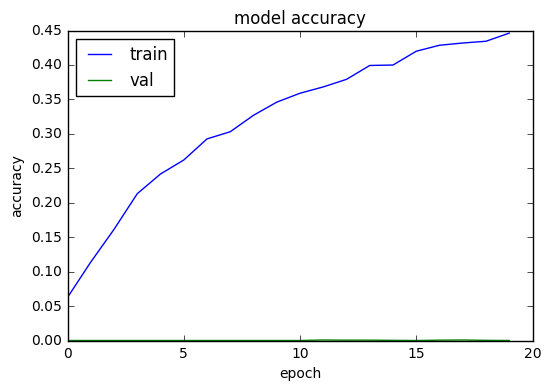

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

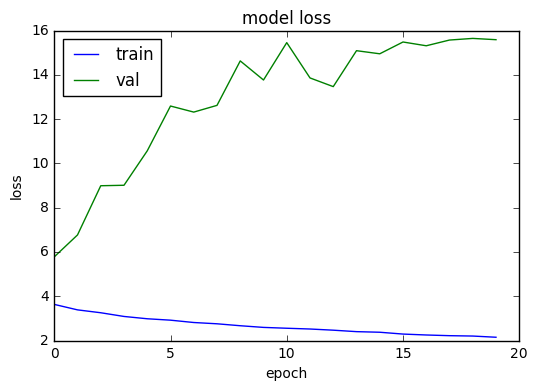

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model2D.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model2D.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 51.74%
